In [ ]:
import numpy as np
import pandas as pd
import json
import nltk
import re
import math
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from random import randint
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import bigrams
nltk.download('stopwords')
stops = set(stopwords.words("english")) 
stemming = PorterStemmer()    
nltk.download('punkt')
# as demanded by nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def remove_stops(row):
    meaningful_words = [w for w in row if not w in stops]
    return (meaningful_words)
# code courtesy - https://pythonhealthcare.org/2018/12/14/101-pre-processing-data-tokenization-stemming-and-removal-of-stop-words/

In [ ]:
conf_mat=np.zeros((5,5))

In [ ]:
def json_reader(fname):
    """
        Read multiple json files
        Args:
            fname: str: input file
        Returns:
            generator: iterator over documents 
    """
    for line in open(fname, mode="r"):
        yield json.loads(line)
# code courtesy - Prof. Parag Singla COL774

In [ ]:
vocab = set()
data_c1 = {}
data_c2 ={}
data_c3 = {}
data_c4 = {}
data_c5 = {}
y1=0
y2=0
y3=0
y4=0
y5=0
n =0
op=0
pry1=0
pry2=0
pry3=0
pry4=0
pry5=0
for entry in json_reader("/content/drive/MyDrive/train.json"):
    op+=1
    s = entry['text']
    #print(s)
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    #print(arr)
    n += 1
    if cat ==1.0:
        y1+= len(arr)
        pry1+=1
    elif cat ==2.0:
        y2+= len(arr)
        pry2+=1
    elif cat==3.0:
        y3+= len(arr)
        pry3+=1
    elif cat==4.0:
        y4+= len(arr)
        pry4+=1
    elif cat==5.0:
        y5+= len(arr)
        pry5+=1
    for i in arr:
        temp = i
        vocab.add(temp)
        if cat==1.0:
            if temp in data_c1:
                data_c1[temp] += 1
            else:
                data_c1[temp]=1
        elif cat==2.0:
            if temp in data_c2:
                data_c2[temp] += 1
            else:
                data_c2[temp]=1
        elif cat==3.0:
            if temp in data_c3:
                data_c3[temp] += 1
            else:
                data_c3[temp]=1
        elif cat==4.0:
            if temp in data_c4:
                data_c4[temp] += 1
            else:
                data_c4[temp]=1
        elif cat==5.0:
            if temp in data_c5:
                data_c5[temp] += 1
            else:
                data_c5[temp]=1
    #if op>0:
      #break

In [ ]:
#print(vocab)
#print(data_c3)
#print(y3)

In [ ]:
#print(data_c3)
#print(data_c5)
v = len(vocab)
print(v)

337363


In [ ]:
prior_1 = pry1/n
prior_2 = pry2/n
prior_3 = pry3/n
prior_4 = pry4/n
prior_5 = pry5/n
print(prior_1)
print(prior_2)
print(prior_3)
print(prior_4)
print(prior_5)
print(n)

0.15011255029240642
0.08140826216365785
0.10977018800759808
0.21985446985446985
0.43885452968186783
534872


In [ ]:
def prediction(arr,n1,n2,n3,n4,n5,data_co1,data_co2,data_co3,data_co4,data_co5,pr1,pr2,pr3,pr4,pr5,vo):
  p1 = 0.0
  p2 = 0.0 
  p3 = 0.0
  p4 = 0.0
  p5 = 0.0
  for word in arr:
    if word in data_co1:
                p1 +=  math.log((1+data_co1[word]))
                p1 -= math.log((vo+n1))
    else:
                p1 -= math.log((vo+n1))
  for word in arr:
    if word in data_co2:
                p2 +=  math.log((1+data_co2[word]))
                p2 -= math.log((vo+n2))
    else:
                p2 -= math.log((vo+n2))
  for word in arr:
    if word in data_co3:
                p3 +=  math.log((1+data_co3[word]))
                p3 -= math.log((vo+n3))
    else:
                p3 -= math.log((vo+n3))
  for word in arr:
    if word in data_co4:
                p4 +=  math.log((1+data_co4[word]))
                p4 -= math.log((vo+n4))
    else:
                p4 -= math.log((vo+n4))
  for word in arr:
    if word in data_co5:
                p5 +=  math.log((1+data_co5[word]))
                p5 -= math.log((vo+n5))
    else:
                p5 -= math.log((vo+n5))
  p1  += math.log(pr1)
  p2  += math.log(pr2)
  p3  += math.log(pr3)
  p4  += math.log(pr4)
  p5  += math.log(pr5)
  probs= max(p1,p2,p3,p4,p5)   
  #print(p1)
  #print(p2)
  #print(p3)
  #print(p4)
  #print(p5) 
  if probs==p1:
    return 1.0
  if probs==p2:
    return 2.0
  if probs==p3:
    return 3.0
  if probs==p4:
    return 4.0
  if probs==p5:
    return 5.0
  return 0.0

In [ ]:
correct =0
op=0 
for entry in json_reader("/content/drive/MyDrive/train.json"):
    op +=1
    s = entry['text']
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    arr = [stemming.stem(word) for word in arr]  #stemming
    arr = remove_stops(arr) # removing stopwords
    pred = prediction(arr,y1,y2,y3,y4,y5,data_c1,data_c2,data_c3,data_c4,data_c5,prior_1,prior_2,prior_3,prior_4,prior_5,v)
    #print(cat)
    #print(pred)
    if pred == cat:
      correct += 1
    #if op>10:
      #break
print(correct)

343100


In [ ]:
print(correct/n)

0.6414618824690768


In [ ]:
correct_test =0
op=0 
for entry in json_reader("/content/drive/MyDrive/test.json"):
    op +=1
    s = entry['text']
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    pred = prediction(arr,y1,y2,y3,y4,y5,data_c1,data_c2,data_c3,data_c4,data_c5,prior_1,prior_2,prior_3,prior_4,prior_5,v)
    conf_mat[int(pred-1)][int(cat-1)] +=1
    if pred == cat:
      correct_test += 1
print(correct_test)

80757


In [ ]:
print(correct_test/op)
print(len(vocab))
print(conf_mat)
print(op)

0.6039351471006147
337363
[[14631.  2945.  1431.  1109.  3091.]
 [ 3367.  2923.  1436.   551.   255.]
 [ 1215.  3240.  4724.  2058.   451.]
 [  561.  1318.  5970. 18390. 14936.]
 [  395.   412.   970.  7250. 40089.]]
133718


In [ ]:
correct_test1 =0
op=0
for entry in json_reader("/content/drive/MyDrive/test.json"):
    op+=1
    cat = entry['stars'] 
    #print(cat)
    if cat==5.0:
      correct_test1 += 1
print(correct_test1)

58822


In [ ]:
print(correct_test1/op)
print(op)

0.439895900327555
133718


In [ ]:
correct_test2 =0
for entry in json_reader("/content/drive/MyDrive/test.json"):
    num = randint(1,5)
    cat = entry['stars'] 
    if cat==num:
      correct_test2 += 1
print(correct_test2)

26807


In [ ]:
print(correct_test2/op)

0.20047413212880838


In [ ]:
#one vs all models 
# 1 vs rest model
voc1 = set()
datac1 = {}
datacrest ={}
y_1=0
y_rest=0
n_1 =0
op=0
pr_y1=0
pr_yrest=0
for entry in json_reader("/content/drive/MyDrive/train.json"):
    op+=1
    s = entry['text']
    #print(s)
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    #print(arr)
    n_1 += 1
    if cat ==1.0:
        y_1+= len(arr)
        pr_y1+=1
    else:
        y_rest+=len(arr)
        pr_yrest+=1
    for i in arr:
        temp = i
        voc1.add(temp)
        if cat==1.0:
            if temp in datac1:
                datac1[temp] += 1
            else:
                datac1[temp]=1
        else:
            if temp in datacrest:
                datacrest[temp] += 1
            else:
                datacrest[temp]=1
    #if op>0:
      #break

In [ ]:
print(pr_y1)
print(pr_yrest)
vnot1 = len(voc1)
prio_y1 = pr_y1/n_1
prio_yrest = pr_yrest/n_1
print(prio_y1)
print(prio_yrest)
print(vnot1)

80291
454581
0.15011255029240642
0.8498874497075936
337363


In [ ]:
def prediction1(arr,n1,data_co1,pr1,vo,n2,data_co2,pr2):
  p1 = 0.0
  p2 = 0.0
  for word in arr:
    if word in data_co1:
                p1 +=  math.log((1+data_co1[word]))
                p1 -= math.log((vo+n1))
    else:
                p1 -= math.log((vo+n1))
  for word in arr:
    if word in data_co2:
                p2 +=  math.log((1+data_co2[word]))
                p2 -= math.log((vo+n2))
    else:
                p2 -= math.log((vo+n2))
  p1  += math.log(pr1)
  p1 = -1*p1
  p2 += math.log(pr2)
  p2 = -1*p2
  #print(p1)
  olo = p2/p1
  ret =-1.0 
  if olo>=1.0:
    ret =1.0
  olo -=0.5
  return (olo,ret)

In [ ]:
labs_1 = np.zeros(133718)
res_1 = np.zeros(133718)

In [ ]:
op=0
correct_pred=0
for entry in json_reader("/content/drive/MyDrive/test.json"):
    s = entry['text']
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    pred,pred_c1 = prediction1(arr,y_1,datac1,prio_y1,vnot1,y_rest,datacrest,prio_yrest)
    if cat != 1.0:
      cat=-1.0
    labs_1[op]=cat
    res_1[op]=pred
    if(pred_c1==cat):
      correct_pred+=1
    op +=1
    

In [ ]:
print(labs_1)
print(res_1)
maxo = np.amax(res_1)
print(maxo)
if maxo >= 1.0:
  res_1 /= maxo
print(res_1)
print(correct_pred/op)

[-1. -1. -1. ...  1. -1.  1.]
[0.44229152 0.50571208 0.47143668 ... 0.57335716 0.46093253 0.54110051]
0.6218008591666899
[0.44229152 0.50571208 0.47143668 ... 0.57335716 0.46093253 0.54110051]
108949.0


In [ ]:
fpr,tpr,thresholds = roc_curve(labs_1,res_1)

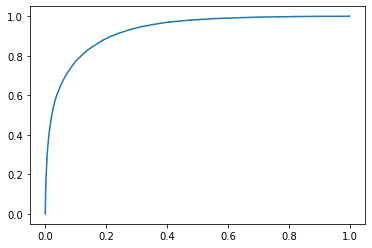

In [ ]:
plt.plot(fpr,tpr)

In [ ]:
print(thresholds)

[ 1.62180086  0.62180086  0.57889261 ...  0.38020176  0.09011102
 -0.41423016]


In [ ]:
#one vs all models 
# 5 vs rest model
voc5 = set()
datac5 = {}
datacrest5 ={}
y_5=0
y_rest5=0
n_5 =0
op=0
pr_y5=0
pr_yrest5=0
for entry in json_reader("/content/drive/MyDrive/train.json"):
    op+=1
    s = entry['text']
    #print(s)
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    #print(arr)
    n_5 += 1
    if cat ==5.0:
        y_5+= len(arr)
        pr_y5+=1
    else:
        y_rest5+=len(arr)
        pr_yrest5+=1
    for i in arr:
        temp = i
        voc5.add(temp)
        if cat==5.0:
            if temp in datac5:
                datac5[temp] += 1
            else:
                datac5[temp]=1
        else:
            if temp in datacrest5:
                datacrest5[temp] += 1
            else:
                datacrest5[temp]=1
    #if op>0:
      #break

In [ ]:
print(pr_y5)
print(pr_yrest5)
vnot5 = len(voc5)
prio_y5 = pr_y5/n_5
prio_yrest5 = pr_yrest5/n_5
print(prio_y5)
print(prio_yrest5)
print(vnot5)

234731
300141
0.43885452968186783
0.5611454703181322
337363


In [ ]:
labs_5 = np.zeros(133718)
res_5 = np.zeros(133718)

In [ ]:
op=0
correct_pred=0
for entry in json_reader("/content/drive/MyDrive/test.json"):
    s = entry['text']
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    arr = nltk.word_tokenize(s)   # splitting sentences into words
    arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    pred,pred_c5 = prediction1(arr,y_5,datac5,prio_y5,vnot5,y_rest5,datacrest5,prio_yrest5)
    if cat != 5.0:
      cat=-1.0
    else:
      cat=1.0
    labs_5[op]=cat
    res_5[op]=pred
    if pred_c5==cat:
      correct_pred+=1
    op +=1
    

In [ ]:
print(labs_5)
print(res_5)
maxo = np.amax(res_5)
print(maxo)
if maxo>=1.0:
  res_5 /= maxo
print(res_5)
print(correct_pred/op)

[ 1. -1. -1. ... -1. -1. -1.]
[0.50684661 0.49189174 0.48546573 ... 0.46965694 0.49376926 0.48027844]
0.6607943109174204
[0.50684661 0.49189174 0.48546573 ... 0.46965694 0.49376926 0.48027844]
108949.0


In [ ]:
fpr5,tpr5,thresholds5 = roc_curve(labs_5,res_5)

In [ ]:
print(np.shape(thresholds5))

(34210,)


In [ ]:
labs_micro = np.concatenate((labs_1,labs_5))
res_micro = np.concatenate((res_1,res_5))

In [ ]:
print(np.shape(labs_micro))
print(np.shape(res_micro))

(267436,)
(267436,)


In [ ]:
fpr_micro,tpr_micro,tr_micro = roc_curve(labs_micro,res_micro)

In [ ]:
all_fpr = np.unique(np.concatenate((fpr,fpr5)))
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
  if i==0:
    mean_tpr += interp(all_fpr,fpr,tpr)
  else:
    mean_tpr += interp(all_fpr,fpr5,tpr5)
mean_tpr /=2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


reference for micro and macro plots -https://www.dlology.com/blog/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier/


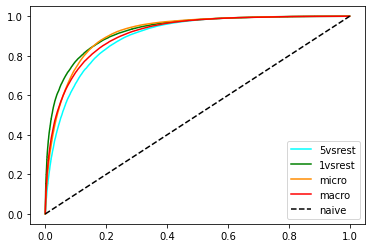

In [ ]:
plt.plot(fpr5,tpr5 ,label='5vsrest',color='cyan')
plt.plot(fpr,tpr ,label='1vsrest',color='green')
plt.plot(fpr_micro,tpr_micro , color='darkorange',label='micro')
plt.plot(all_fpr,mean_tpr,color='red',label='macro')
plt.plot([0, 1], [0, 1], 'k--',  label ='naive')
plt.legend()
plt.show()

In [ ]:
vocab = set()
data_c1 = {}
data_c2 ={}
data_c3 = {}
data_c4 = {}
data_c5 = {}
y1=0
y2=0
y3=0
y4=0
y5=0
n =0
op=0
pry1=0
pry2=0
pry3=0
pry4=0
pry5=0
for entry in json_reader("/content/drive/MyDrive/train.json"):
    op+=1
    s = entry['text']
    #print(s)
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    s=s.lower()
    arr = list(bigrams(s.split()))   # splitting sentences into words
    #arr=[x.lower() for x in arr]   # lower casing all words
    #arr = [stemming.stem(word) for word in arr]  #stemming
    #arr = remove_stops(arr) # removing stopwords
    #print(arr)
    n += 1
    if cat ==1.0:
        y1+= len(arr)
        pry1+=1
    elif cat ==2.0:
        y2+= len(arr)
        pry2+=1
    elif cat==3.0:
        y3+= len(arr)
        pry3+=1
    elif cat==4.0:
        y4+= len(arr)
        pry4+=1
    elif cat==5.0:
        y5+= len(arr)
        pry5+=1
    for i in arr:
        temp = i
        vocab.add(temp)
        if cat==1.0:
            if temp in data_c1:
                data_c1[temp] += 1
            else:
                data_c1[temp]=1
        elif cat==2.0:
            if temp in data_c2:
                data_c2[temp] += 1
            else:
                data_c2[temp]=1
        elif cat==3.0:
            if temp in data_c3:
                data_c3[temp] += 1
            else:
                data_c3[temp]=1
        elif cat==4.0:
            if temp in data_c4:
                data_c4[temp] += 1
            else:
                data_c4[temp]=1
        elif cat==5.0:
            if temp in data_c5:
                data_c5[temp] += 1
            else:
                data_c5[temp]=1
    #if op>0:
      #break

In [ ]:
prior_1 = pry1/n
prior_2 = pry2/n
prior_3 = pry3/n
prior_4 = pry4/n
prior_5 = pry5/n
print(prior_1)
print(prior_2)
print(prior_3)
print(prior_4)
print(prior_5)
print(n)

0.15011255029240642
0.08140826216365785
0.10977018800759808
0.21985446985446985
0.43885452968186783
534872


In [ ]:
v = len(vocab)
print(v)

5474116


In [ ]:
correct_test =0
op=0 
for entry in json_reader("/content/drive/MyDrive/test.json"):
    op +=1
    s = entry['text']
    #print(s)
    cat = entry['stars']
    s=re.sub(r'[^\w\s]', '', s) # removes punctuations
    s=s.lower()
    arr = list(bigrams(s.split()))   # splitting sentences into words
    pred = prediction(arr,y1,y2,y3,y4,y5,data_c1,data_c2,data_c3,data_c4,data_c5,prior_1,prior_2,prior_3,prior_4,prior_5,v)
    #conf_mat[int(pred-1)][int(cat-1)] +=1
    if pred == cat:
      correct_test += 1
print(correct_test)

85543


In [ ]:
print(correct_test/op)

0.6397268879283268
